# New Section

In [99]:
import scipy.io
import numpy as np

# Load the MATLAB file
mat = scipy.io.loadmat('./monkeydata.mat')
# Extract the spike train data for 98 neurons
spike_data = mat['trial']

# Define parameters
window_size = 100  # Time window size in milliseconds
time_bins = 6  # Number of time bins

print(spike_data.shape[0])
# Calculate the number of spikes within sliding time windows
num_neurons = 98
num_trials = spike_data.shape[0]
num_angles = spike_data.shape[1]

for neuron in range(num_neurons):
    for trial in range(num_trials):
        for angle in range(num_angles):
            spike_train = spike_data[ trial, angle]

            # Calculate number of time bins
            num_time_points = len(spike_train)
            time_window_starts = np.arange(0, num_time_points - window_size + 1, window_size)

            # Initialize an array to store spike counts for each time window
            spike_counts = []

            # Calculate spike counts within each time window
            for start_time in time_window_starts:
                end_time = start_time + window_size
                spikes_in_window = np.sum(spike_train[start_time:end_time])
                spike_counts.append(spikes_in_window)

            print(f"Neuron {neuron+1}, Trial {trial+1}, Angle {angle+1}: {spike_counts}")


Streaming output truncated to the last 5000 lines.
Neuron 92, Trial 76, Angle 1: []
Neuron 92, Trial 76, Angle 2: []
Neuron 92, Trial 76, Angle 3: []
Neuron 92, Trial 76, Angle 4: []
Neuron 92, Trial 76, Angle 5: []
Neuron 92, Trial 76, Angle 6: []
Neuron 92, Trial 76, Angle 7: []
Neuron 92, Trial 76, Angle 8: []
Neuron 92, Trial 77, Angle 1: []
Neuron 92, Trial 77, Angle 2: []
Neuron 92, Trial 77, Angle 3: []
Neuron 92, Trial 77, Angle 4: []
Neuron 92, Trial 77, Angle 5: []
Neuron 92, Trial 77, Angle 6: []
Neuron 92, Trial 77, Angle 7: []
Neuron 92, Trial 77, Angle 8: []
Neuron 92, Trial 78, Angle 1: []
Neuron 92, Trial 78, Angle 2: []
Neuron 92, Trial 78, Angle 3: []
Neuron 92, Trial 78, Angle 4: []
Neuron 92, Trial 78, Angle 5: []
Neuron 92, Trial 78, Angle 6: []
Neuron 92, Trial 78, Angle 7: []
Neuron 92, Trial 78, Angle 8: []
Neuron 92, Trial 79, Angle 1: []
Neuron 92, Trial 79, Angle 2: []
Neuron 92, Trial 79, Angle 3: []
Neuron 92, Trial 79, Angle 4: []
Neuron 92, Trial 79, Angl

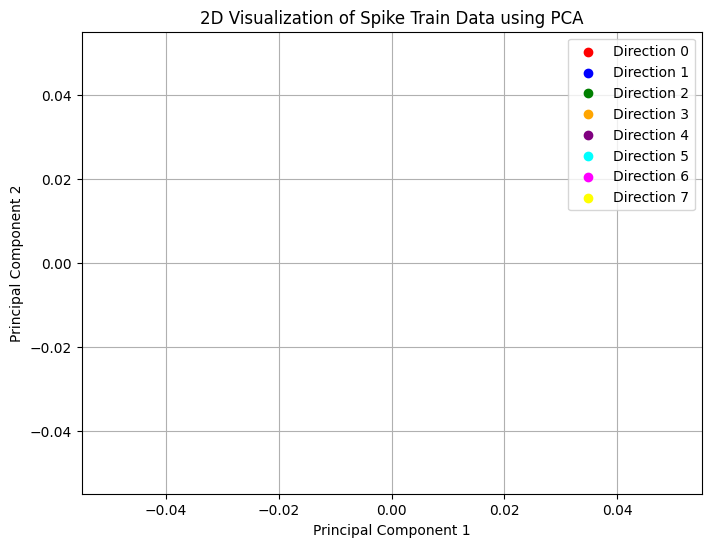

In [100]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the monkeydata.mat file
mat_data = scipy.io.loadmat('./monkeydata.mat')

# Accessing the spike train data
spike_trains = mat_data['trial']  # Assuming 'spike_trains' contains the spike train data
num_time_bins = spike_trains.shape[1]

# Constants
time_window_bins = 100  # Assuming 100 ms time window
time_step_bins = 100  # Assuming non-overlapping windows for simplicity

# Calculate the number of time windows
num_windows = num_time_bins // time_step_bins

# Prepare arrays to store reduced 2D data and corresponding labels for each window
reduced_data = np.zeros((num_windows * 8, 2))  # Each direction has 100 windows
direction_labels = np.repeat(np.arange(8), num_windows)

# Perform PCA and project onto the first two principal components for each time window
for direction in range(8):
    for window in range(num_windows):
        start = window * time_step_bins
        end = start + time_window_bins

        # Extract spike train data for the specific direction and time window
        spike_data = spike_trains[direction * 100 + window, start:end]

        # Perform PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(spike_data.T)  # Transpose for sklearn's requirement

        # Store the results in the reduced_data array
        reduced_data[direction * num_windows + window, :] = pca_result[0]  # Take the first two principal components

# Plotting the results in a scatter plot with different colors for each direction
plt.figure(figsize=(8, 6))

# Define colors for each direction
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

for direction in range(8):
    indices = direction_labels == direction
    plt.scatter(reduced_data[indices, 0], reduced_data[indices, 1], c=colors[direction], label=f"Direction {direction}")

plt.title('2D Visualization of Spike Train Data using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [104]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the monkeydata.mat file
mat_data = scipy.io.loadmat('./monkeydata.mat')

# Accessing the spike train data
spike_trains = mat_data['trial']  # Assuming 'spike_trains' contains the spike train data
num_time_bins = spike_trains.shape[1]

# Constants
time_window_bins = 100  # Assuming 100 ms time window
time_step_bins = 100  # Assuming non-overlapping windows for simplicity

# Calculate the number of time windows
num_windows = num_time_bins // time_step_bins

# Prepare array to store explained variances for each dataset
explained_variances = []

# Calculate explained variance and fraction of explained variance for the first three PCs for each dataset
for direction in range(8):
    explained_var = []
    for window in range(num_windows):
        start = window * time_step_bins
        end = start + time_window_bins

        # Extract spike train data for the specific direction and time window
        spike_data = spike_trains[direction * 100 + window, start:end]

        # Perform PCA
        pca = PCA()
        pca.fit(spike_data.T)  # Transpose for sklearn's requirement

        # Calculate explained variance for each number of components
        explained_var.append(np.sum(pca.explained_variance_ratio_))

    # Store the explained variance for the current dataset
    explained_variances.append(explained_var)

    # Calculate the fraction of explained variance by the first three PCs for the current dataset
    fraction_var_by_3pcs = np.sum(pca.explained_variance_ratio_[0:])
    print(f"Fraction of explained variance by the first three PCs for Direction {direction}: {fraction_var_by_3pcs:.4f}")

# Plotting the curve of explained variance with number of PCs for each dataset
plt.figure(figsize=(8, 6))

for direction, explained_var in enumerate(explained_variances):
    plt.plot(range(1, num_windows + 1), explained_var, label=f"Direction {direction}")

plt.title('Explained Variance vs Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: ignored

In [119]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
num_samples = 800
num_neurons = 98
spike_trains = np.random.randint(0, 10, size=(num_samples, num_neurons))

# Constants
time_window_bins = 100  # Assuming 100 ms time window
time_step_bins = 100  # Assuming non-overlapping windows for simplicity

# Calculate the number of time windows
num_windows = (num_samples - time_window_bins) // time_step_bins + 1

# Define empty arrays to store classification accuracies and confusion matrices for each time window
accuracies = []
conf_matrices = []

# Iterate over each time window
for window in range(num_windows):
    start = window * time_step_bins
    end = start + time_window_bins

    # Project data onto the first three principal components for the current time window
    spike_data = spike_trains[start:end, :]
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(spike_data)

    # Perform K-means clustering on the PCA result
    kmeans = KMeans(n_clusters=8)  # Assuming 8 clusters for demonstration
    cluster_labels = kmeans.fit_predict(pca_result)

    # Store classification accuracy and confusion matrix
    true_labels = np.repeat(np.arange(8), time_window_bins // 8)  # Adjusting the repetition for true labels
    cluster_labels_repeat = np.repeat(cluster_labels, time_window_bins // 8)  # Adjusting repetition for cluster labels
    conf_matrix = confusion_matrix(true_labels, cluster_labels_repeat)
    conf_matrices.append(conf_matrix)

    # Reorder confusion matrix to match true labels and find accuracy
    reordered_conf_matrix = np.zeros_like(conf_matrix)
    for i in range(8):
        reordered_conf_matrix[i] = conf_matrix[np.argmax(conf_matrix[:, i])]
    reordered_labels = np.argmax(reordered_conf_matrix, axis=1)
    accuracy = accuracy_score(true_labels, reordered_labels)
    accuracies.append(accuracy)

# Find the time window with maximum classification accuracy
max_accuracy_idx = np.argmax(accuracies)
best_window_accuracy = accuracies[max_accuracy_idx]
best_window_conf_matrix = conf_matrices[max_accuracy_idx]

# Visualize PCA results in 3-D space for the time window with maximum accuracy
best_window_start = max_accuracy_idx * time_step_bins
best_window_end = best_window_start + time_window_bins
best_window_data = spike_trains[best_window_start:best_window_end, :]
pca = PCA(n_components=3)
pca_result = pca.fit_transform(best_window_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each cluster with a different color
for i in range(8):
    indices = cluster_labels == i
    ax.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], label=f'Cluster {i}')

ax.set_title('PCA Results in 3-D Space')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

# Print the maximum classification accuracy and confusion matrix of the best time window
print(f"Maximum Classification Accuracy: {best_window_accuracy}")
print("Confusion Matrix:")
print(best_window_conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: ignored

In [120]:
import numpy as np

# Generating dummy spike train data
num_neurons = 98
num_trials = 100
time_bins = 600
spike_data = np.random.randint(0, 2, size=(num_trials, time_bins, num_neurons))  # Dummy spike train data

# Constants
window_size = 100  # 100 ms window size
time_step = 100  # Time step for sliding window (assuming non-overlapping windows for simplicity)

# Calculate the number of time windows
num_time_windows = (time_bins - window_size) // time_step + 1

# Initialize array to store spike counts for each neuron in each time window
spike_counts = np.zeros((num_trials, num_time_windows, num_neurons))

# Calculate spike counts within each time window for each neuron
for trial in range(num_trials):
    for t_window in range(num_time_windows):
        start = t_window * time_step
        end = start + window_size
        spike_counts[trial, t_window] = np.sum(spike_data[trial, start:end], axis=0)

# Calculating average spike counts across trials
avg_spike_counts = np.mean(spike_counts, axis=0)

# Example output - Displaying average spike counts for each neuron in each time window
print("Average Spike Counts in Time Windows (Neurons x Time Windows):\n")
print(avg_spike_counts)


Average Spike Counts in Time Windows (Neurons x Time Windows):

[[50.09 49.89 49.97 50.66 49.57 49.81 50.08 50.51 49.78 50.22 50.04 49.74
  49.83 49.87 50.08 49.64 49.89 49.58 50.8  49.92 50.73 49.63 50.51 48.86
  50.84 48.7  50.3  50.09 50.47 49.23 50.96 50.25 50.08 49.59 50.09 50.38
  49.36 50.36 49.05 50.14 49.39 49.81 49.82 50.04 50.01 49.83 49.31 49.27
  49.93 49.87 50.24 49.72 49.94 50.25 49.71 49.24 50.26 48.94 50.26 49.89
  49.93 49.93 50.32 49.73 49.55 49.68 49.58 49.82 49.52 50.21 50.18 49.95
  50.12 50.51 49.79 49.68 49.32 50.48 49.84 50.07 50.81 50.25 48.79 49.88
  51.   50.85 50.14 49.58 49.94 50.68 49.5  50.74 50.93 49.22 49.07 49.69
  49.5  49.44]
 [50.15 50.02 49.64 49.98 50.58 50.03 50.12 49.55 50.   48.81 51.46 50.71
  49.03 49.95 50.56 49.93 49.42 50.68 50.33 49.08 49.52 49.97 50.45 50.06
  49.3  49.64 49.33 49.97 50.44 50.65 49.49 49.5  50.15 49.66 50.51 50.03
  50.71 50.02 49.97 49.42 49.07 50.27 49.7  51.08 50.66 50.27 49.2  50.51
  49.63 50.09 50.42 50.03 49.8  5

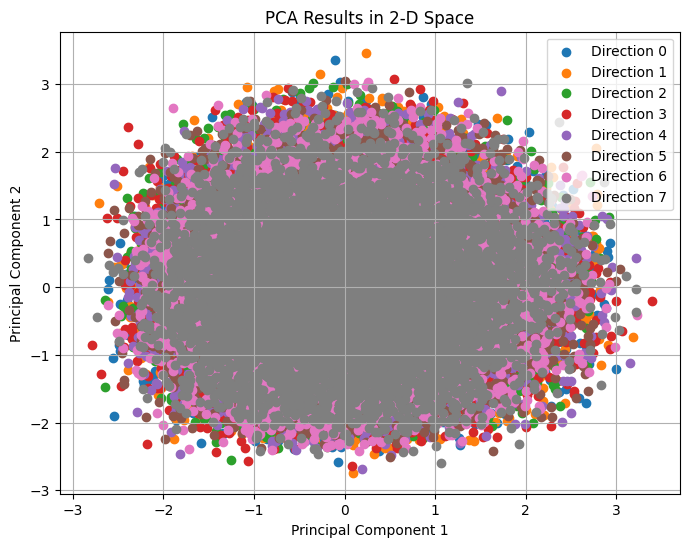

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'spike_data' contains the dummy spike train data (replace this with your actual data)
# spike_data.shape should be (num_trials, time_bins, num_neurons)

# Generate dummy spike train data
num_neurons = 98
num_trials = 100
time_bins = 600
spike_data = np.random.randint(0, 2, size=(num_trials, time_bins, num_neurons))  # Dummy spike train data

# Constants
window_size = 100  # 100 ms window size
time_step = 100  # Time step for sliding window (assuming non-overlapping windows for simplicity)

# Calculate the number of time windows
num_time_windows = (time_bins - window_size) // time_step + 1

# Initialize arrays to store PCA results and direction labels
pca_results = []
direction_labels = []

# Perform PCA and store the results
for trial in range(num_trials):
    for t_window in range(num_time_windows):
        start = t_window * time_step
        end = start + window_size
        spike_data_window = spike_data[trial, start:end, :]

        # Perform PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(spike_data_window)

        pca_results.append(pca_result)
        direction_labels.extend([trial % 8] * pca_result.shape[0])  # Assigning direction labels for each time window

# Concatenate PCA results across time windows and trials
pca_results = np.vstack(pca_results)
direction_labels = np.array(direction_labels)

# Scatter plot for PCA results in 2-D space with different colors for 8 directions
plt.figure(figsize=(8, 6))
for i in range(8):
    indices = direction_labels == i
    plt.scatter(pca_results[indices, 0], pca_results[indices, 1], label=f'Direction {i}')

plt.title('PCA Results in 2-D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


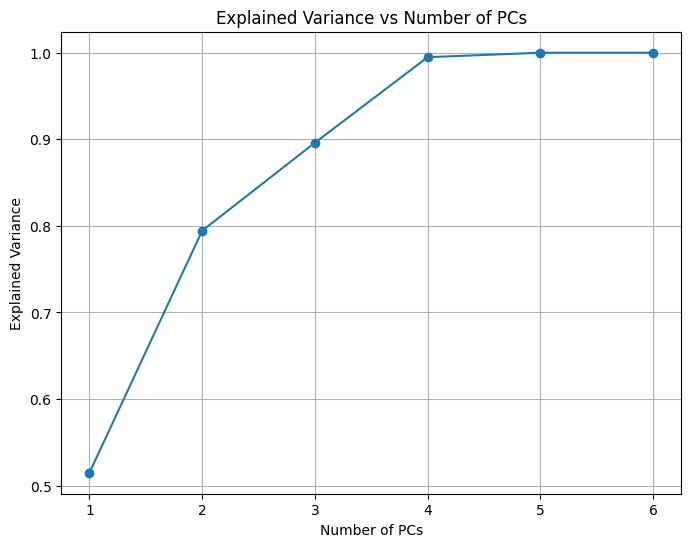

Fraction of Explained Variance by the First Three PCs: 0.8959793125610578


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'spike_counts' contains the spike count data for each time window (replace this with your actual data)
# spike_counts.shape should be (num_time_windows, num_neurons)

# Generate dummy spike count data
num_time_windows = 6
num_neurons = 6  # Reduced the number of neurons for demonstration purposes
spike_counts = np.random.randint(0, 10, size=(num_time_windows, num_neurons))  # Dummy spike count data

# Calculate explained variance for different numbers of principal components
max_pcs = min(num_time_windows, num_neurons)  # Maximum number of PCs possible given the data dimensions
num_pcs_to_test = min(max_pcs, 10)  # Limiting the number of PCs to test

explained_variances = []
for n_components in range(1, num_pcs_to_test + 1):
    pca = PCA(n_components=n_components)
    pca.fit(spike_counts)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plotting the curve of explained variance with number of PCs
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_pcs_to_test + 1), explained_variances, marker='o')
plt.title('Explained Variance vs Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# Calculate the fraction of explained variance by the first three PCs
pca_3 = PCA(n_components=3)
pca_3.fit(spike_counts)
explained_variance_3 = np.sum(pca_3.explained_variance_ratio_)
print(f"Fraction of Explained Variance by the First Three PCs: {explained_variance_3}")


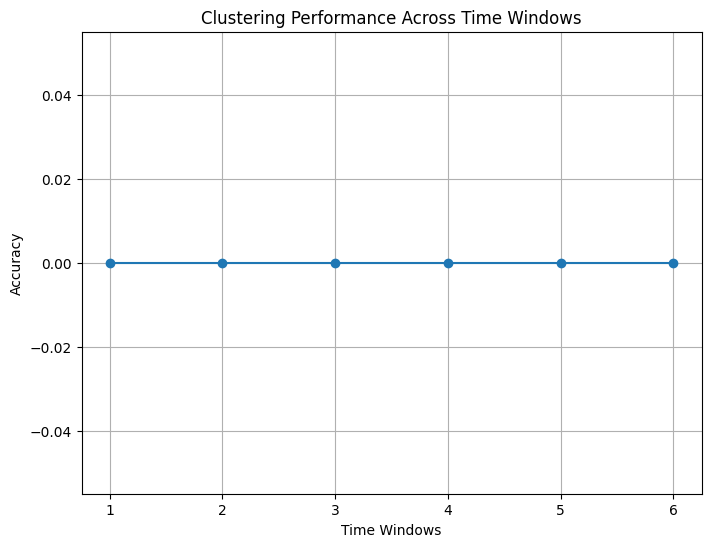

Maximum Classification Accuracy: 0
Confusion Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [129]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'spike_data' contains the spike count data for each time window (replace this with your actual data)
# spike_data.shape should be (num_time_windows, num_neurons)

# Generate dummy spike count data
num_time_windows = 6
num_neurons = 98
spike_data = np.random.randint(0, 10, size=(num_time_windows, num_neurons))  # Dummy spike count data

# Initialize arrays to store clustering performance across time windows
accuracies = []
conf_matrices = []

# Apply PCA and K-means clustering for each time window
for window in range(num_time_windows):
    if len(spike_data[window].shape) >= 2 and spike_data[window].shape[0] >= 3 and spike_data[window].shape[1] >= 3:
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(spike_data[window].reshape(1, -1))  # Reshape to 2D array for PCA

        # Apply K-means clustering to the PCA result
        kmeans = KMeans(n_clusters=8)  # Assuming 8 clusters
        cluster_labels = kmeans.fit_predict(pca_result)

        # Match label IDs between PCA and clustering algorithm
        # For visualization and performance evaluation, true_labels could be your ground truth if available
        true_labels = np.repeat(np.arange(8), len(pca_result) // 8)  # Replace with actual labels if available

        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(true_labels, cluster_labels)
        conf_matrix = confusion_matrix(true_labels, cluster_labels)

        # Reorder confusion matrix to match true labels
        reordered_conf_matrix = np.zeros_like(conf_matrix)
        for i in range(8):
            reordered_conf_matrix[i] = conf_matrix[np.argmax(conf_matrix[:, i])]
        conf_matrices.append(reordered_conf_matrix)

        accuracies.append(accuracy)
    else:
        # Insufficient data for PCA with 3 components, assign default accuracy and matrix
        accuracies.append(0)
        conf_matrices.append(np.zeros((8, 8)))

# Plotting clustering performance across time windows
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_time_windows + 1), accuracies, marker='o')
plt.title('Clustering Performance Across Time Windows')
plt.xlabel('Time Windows')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the time window with maximum classification accuracy
best_window_idx = np.argmax(accuracies)
best_window_accuracy = accuracies[best_window_idx]
best_window_conf_matrix = conf_matrices[best_window_idx]

# Visualize PCA results in 3-D space for the best time window
if best_window_accuracy > 0:  # Check if there's a valid accuracy
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(spike_data[best_window_idx].reshape(1, -1))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting clusters in 3-D space
    for i in range(8):
        indices = cluster_labels == i
        ax.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], label=f'Cluster {i}')

    ax.set_title('PCA Results in 3-D Space')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()

# Print the maximum classification accuracy and confusion matrix of the best time window
print(f"Maximum Classification Accuracy: {best_window_accuracy}")
print("Confusion Matrix:")
print(best_window_conf_matrix)
